In [5]:
import numpy as np
import matplotlib.pyplot as plt
ImagesArray=np.ones([2400, 784])
Centers=np.ones([10, 784])
np.set_printoptions(threshold=700000)






for i in range (0,2400):
    Image=plt.imread('images/'+str(i+1)+'.jpg')
    Image =Image.flatten()
    super_threshold_indices = Image < 140
    Image[super_threshold_indices] = 0
    super_threshold_indices = Image >= 140
    Image[super_threshold_indices] = 1
    ImagesArray[i]=Image
def InitializeCenters():
    M1i=np.random.choice(np.arange(len(ImagesArray)))
    Centers[0]=ImagesArray[M1i];
    NewImagesArray= np.copy(ImagesArray)
    CurrentCenter=Centers[0]
    MaximumDistance=0
    MaximumDistanceLocation=0;
    for i in range(1,10):
        for j in range(0,len(NewImagesArray)):
            if(np.linalg.norm(NewImagesArray[j]-CurrentCenter)>MaximumDistance):
                MaximumDistance=np.linalg.norm(NewImagesArray[j]-CurrentCenter);
                MaximumDistanceLocation=j;
                Centers[i]=NewImagesArray[j];
        NewImagesArray = np.delete(NewImagesArray, MaximumDistanceLocation, axis=0)
        #print(len(NewImagesArray))
        CurrentCenter=Centers[i]
        MaximumDistance=0
        MaximumDistanceLocation=0
    return Centers;
def GetMemberShip(Centers):
    #print("Getting Membership Vector")
    Membership=np.ones([2400])    
    for i in range (0,len(ImagesArray)):
        MinimumDistance=np.linalg.norm(ImagesArray[i]-Centers[0])
        Class=0
        for j in range(1,len(Centers)):
            distance=np.linalg.norm(ImagesArray[i]-Centers[j])
            if(distance<MinimumDistance):
                MinimumDistance=distance
                Class=j
        Membership[i]=Class
    return Membership;


def UpdateCenters(MembershipVector):
    #print("Updating Center")  
    NewImagesArray= np.copy(ImagesArray)
    Centers=np.ones([10, 784])
    KCluster=[]
    for k in range (0,10):
        initialized=False;
        KCluster=None
        for i in range (0,len(MembershipVector)):
            if MembershipVector[i]==k and not(initialized):
                KCluster= NewImagesArray[i]
                #print(KCluster)
                initialized=True
            elif MembershipVector[i]==k and initialized:
                KCluster= np.column_stack((KCluster,NewImagesArray[i]))
        if KCluster is None:
            Centers[k]=None
            
        else:
            Centers[k]=np.mean(KCluster.transpose(), axis=0)
    return Centers

def KCluster():
    #print("Starting")
    Centers=InitializeCenters();
    InitialMembers=GetMemberShip(Centers);
    NewCenters=[]
    NewMemberShip=[]
    while True:
        NewCenters=UpdateCenters(InitialMembers)
        NewMemberShip=GetMemberShip(NewCenters)
        if np.array_equal(NewMemberShip,InitialMembers):
            return [NewMemberShip,NewCenters]
        else:
            InitialMembers=NewMemberShip


        
    
def EvaluateClusters():
    print("Iteration 0")
    minDistance=0;
    Cluster= KCluster();
    Membership=Cluster[0]
    Centers=Cluster[1]
    minDistance =WithinClusterDistances(Membership,Centers)
    minCluster=Cluster;
    #print(minDistance)
    for i in range (1,30):
        print("Iteration "+str(i))
        Cluster= KCluster();
        Membership=Cluster[0]
        Centers=Cluster[1]
        Distance=WithinClusterDistances(Membership,Centers)
        if(Distance<minDistance):
            minDistance=Distance;
            minCluster=Cluster
        #print(WithinClusterDistances(Membership,Centers));
    return minCluster
    
def WithinClusterDistances(MembershipList,Centers):
    distance=0;
    NewImagesArray= np.copy(ImagesArray)
    for i in range (0,len(MembershipList)):
        distance+=np.linalg.norm(NewImagesArray[i]-Centers[int(MembershipList[i])])
    return distance;
        

if __name__ == "__main__":
    BestCluster = EvaluateClusters();
    
    
    


    

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29


[9. 9. 2. 2. 9. 9. 9. 8. 8. 2. 2. 9. 9. 9. 9. 9. 9. 9. 9. 2. 9. 9. 9. 8.
 8. 9. 7. 9. 8. 9. 6. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 2. 9. 9. 9. 9.
 9. 9. 9. 9. 9. 1. 2. 9. 8. 9. 2. 9. 2. 9. 7. 9. 2. 1. 8. 9. 9. 9. 9. 0.
 9. 9. 2. 7. 9. 9. 9. 9. 2. 2. 2. 9. 2. 9. 2. 2. 2. 1. 2. 8. 2. 2. 2. 9.
 2. 8. 2. 9. 9. 2. 9. 8. 9. 8. 9. 9. 9. 8. 9. 8. 2. 9. 6. 2. 2. 9. 2. 2.
 9. 7. 2. 2. 9. 9. 9. 9. 9. 2. 9. 2. 9. 1. 2. 8. 9. 9. 9. 9. 9. 9. 4. 9.
 9. 9. 9. 8. 9. 9. 8. 9. 9. 9. 9. 9. 9. 9. 8. 9. 9. 9. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9. 9. 6. 9. 9. 6. 9. 6. 9. 9. 9. 9. 9. 9. 9. 9. 9.
 9. 9. 2. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 7. 9. 8. 9. 9. 9. 9. 7. 9.
 8. 9. 9. 9. 8. 6. 9. 9. 9. 9. 9. 9. 2. 8. 2. 9. 9. 9. 9. 9. 8. 9. 9. 2.
 4. 6. 6. 6. 4. 6. 4. 4. 4. 6. 6. 4. 4. 4. 6. 6. 4. 4. 4. 4. 4. 8. 4. 4.
 4. 6. 6. 4. 4. 4. 4. 5. 4. 6. 4. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 4. 6. 6.
 6. 6. 4. 6. 6. 4. 4. 4. 4. 4. 6. 4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 6. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 6. 4. 6. 4. 4. 4. 6. 4.

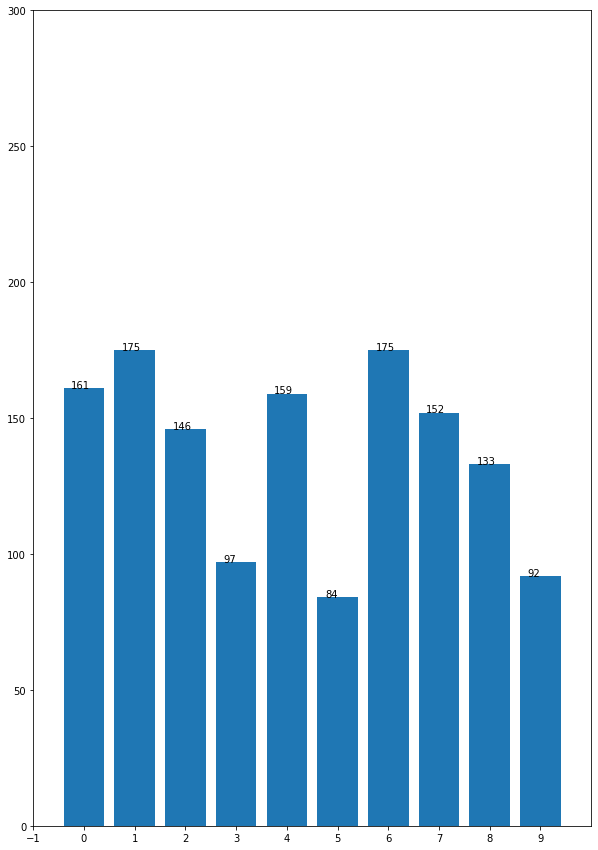

The Accuracy is 
57.25


In [6]:
def CountCluster(Membership):
    Clusters =np.split(Membership,10)
    count=0
    x=[-1,0,1,2,3,4,5,6,7,8,9]
    y=[0]
    for i in range(0,10):
        (values,counts) = np.unique(Clusters[i],return_counts=True)
        ind=np.argmax(counts)
        count+=counts[ind]
        y.append(counts[ind])
    plt.figure(figsize=(10,15))
    plt.axis([0, 10, 0, 300])
    plt.bar(x, y)
    plt.xticks(x)
    for i, v in enumerate(y):
         if not(x[i]==-1):
            plt.text(x[i] - 0.25, v + 0.01, str(v))
    plt.savefig('Counts.jpg')
    plt.show()
    print("The Accuracy is ")
    print(((count/2400))*100)
print(BestCluster[0])
CountCluster(BestCluster[0])